In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def display(image, cmap='gray', title=None):
    plt.figure(figsize=(10, 6))
    plt.imshow(image, cmap=cmap)
    if title:
        plt.title(title)
    plt.show()

reeses = cv2.imread("../../resources/DATA/reeses_puffs.png", 0)
reeses.shape

(560, 560)

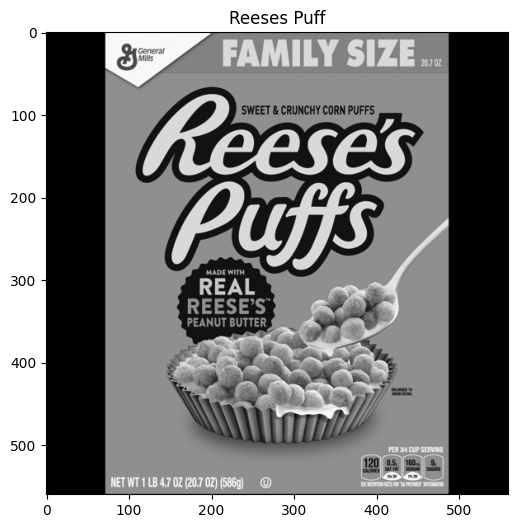

In [2]:
display(reeses, title="Reeses Puff")

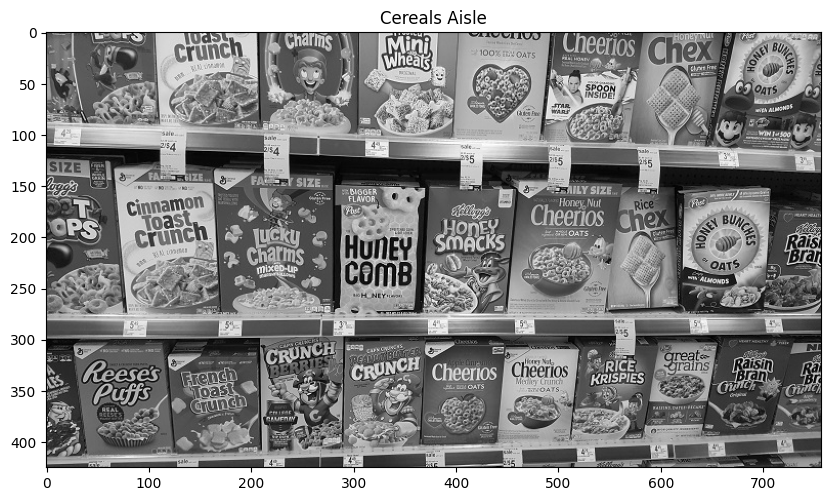

In [3]:
cereals = cv2.imread("../../resources/DATA/many_cereals.jpg", 0)
display(cereals, title="Cereals Aisle")

In [4]:
# brute force detector
orb = cv2.ORB_create()

In [5]:
kp1, des1 = orb.detectAndCompute(reeses, None)
kp2, des2 = orb.detectAndCompute(cereals, None)

In [6]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

In [7]:
type(matches)

tuple

In [8]:
len(matches)

138

In [9]:
matches[0].distance

58.0

In [10]:
matches_sorted = sorted(matches, key=lambda x: x.distance)
matches_sorted[0].distance

42.0

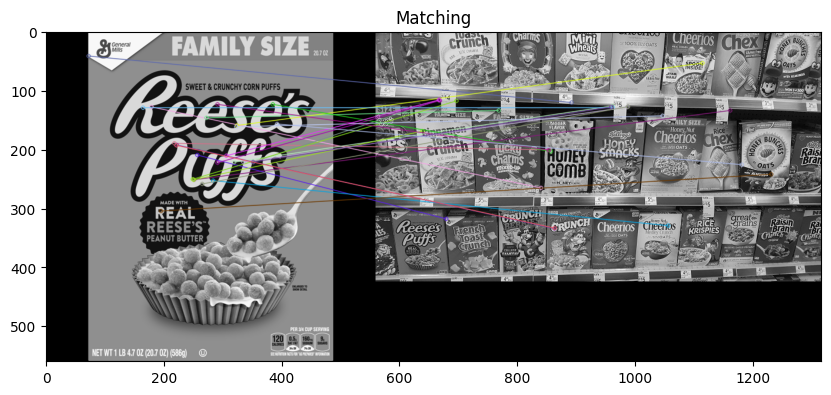

In [11]:
reeses_matches = cv2.drawMatches(reeses, kp1, cereals, kp2, matches_sorted[:25], None, flags=2)
display(reeses_matches, title="Matching")

In [12]:
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [13]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
len(matches)

1502

In [15]:
def filter_good_match(element):
    match1, match2 = element
    # lower distance is better
    # ratio test to understand good pairs
    if (match1.distance / match2.distance) < 0.75:
        return [match1]

good_matches = list(filter(filter_good_match, matches))
good_matches[0:2]

[(< cv2.DMatch 0x11f0c1b30>, < cv2.DMatch 0x11f0c1f30>),
 (< cv2.DMatch 0x11f0c2e90>, < cv2.DMatch 0x11f0c3590>)]

In [16]:
len(good_matches), len(matches)

(78, 1502)

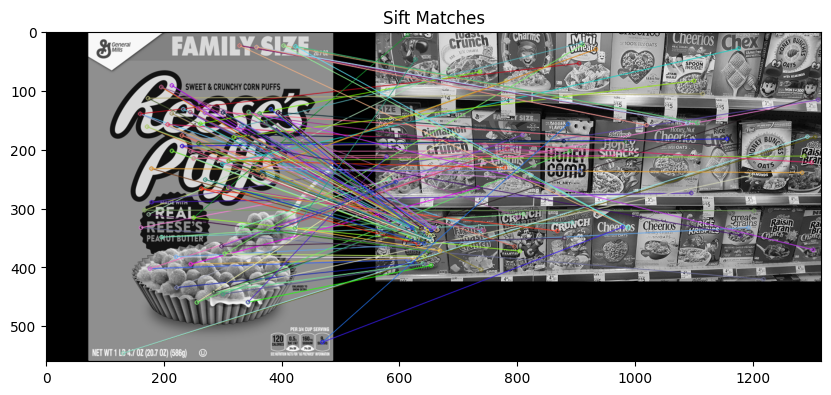

In [17]:
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good_matches, None, flags=2)
display(sift_matches, title="Sift Matches")

In [24]:
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [28]:
# FLANN - Fast Library for Approx Nearest Neighbours
FLANN_INDEX_KDTREE = 0
index_params = {
    'algorithm': FLANN_INDEX_KDTREE,
    'trees': 5
}
search_params = {
    'checks': 50
}

In [29]:
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)
matches_masked = [[0,0] for i in range(len(matches))]

for i, (m1, m2) in enumerate(matches):
    if m1.distance > 0.7*m2.distance:
        continue
    matches_masked[i] = [1,0]

len(matches_masked), len(matches)

(1502, 1502)

In [30]:
draw_params = {
    'matchColor': (0, 255, 0),
    'singlePointColor': (255, 0, 0),
    'matchesMask': matches_masked,
    'flags': 0,
}

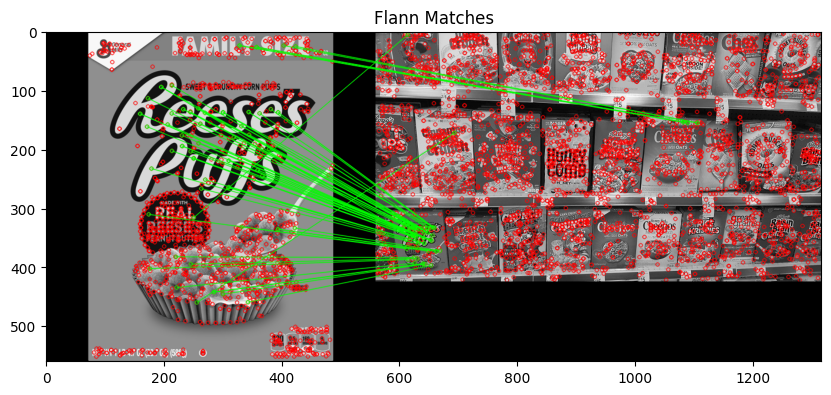

In [31]:
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params)
display(flann_matches, title="Flann Matches")